# Results of evalutation

evaluated tools:
- FastSurfer
- SynthSeg:
    - normal
    - robust
    - fast

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval


In [2]:
freesurfer_df = pd.read_csv("../results/freesurfer_results.csv")
fastsurfer_df = pd.read_csv("../results/fastsurfer_results.csv")
ss_df = pd.read_csv("../results/synthseg_ss_results.csv")
rob_df = pd.read_csv("../results/synthseg_rob_results.csv")
fast_df = pd.read_csv("../results/synthseg_fast_results.csv")

In [3]:
def asd_hd_str_to_arr(df):
    df.AverageSurfaceDistance = df.AverageSurfaceDistance.apply(literal_eval)
    df.Hausdorff = df.Hausdorff.apply(literal_eval)
    return df

In [4]:
freesurfer_df = asd_hd_str_to_arr(freesurfer_df)
fastsurfer_df = asd_hd_str_to_arr(fastsurfer_df)
ss_df = asd_hd_str_to_arr(ss_df)
rob_df = asd_hd_str_to_arr(rob_df)
fast_df = asd_hd_str_to_arr(fast_df)

Tissue classes:


2:  Left White Matter

3:  Left Gray Matter

41: Right White Matter

42: Right Gray Matter


In array order:
[left white matter, left gray matter, right white matter, right gray matter]

In [5]:
ss_df

,Name,Dice,AverageSurfaceDistance,Hausdorff
0,210525,0.913872,"[(0.5877035420615638, 1.1402246996147152), (0....","[6.48074069840786, 2.23606797749979, 6.7082039..."
1,l4879,0.922491,"[(0.6347683396455093, 1.2354566478891469), (0....","[8.0, 2.0, 7.0, 2.0]"
2,l7349,0.915411,"[(0.6365112811836702, 1.1768981523539406), (0....","[7.0, 2.0, 7.0710678118654755, 2.0]"
3,fb9364,0.905508,"[(0.4780304149098425, 1.0008202182868897), (0....","[6.0, 2.449489742783178, 5.385164807134504, 3.0]"
4,fb9455,0.913120,"[(0.5643623369428963, 0.9468893189676084), (0....","[5.385164807134504, 2.23606797749979, 5.196152..."
5,jb1922,0.913149,"[(0.5782481772003217, 1.0238965467621537), (0....","[5.744562646538029, 2.23606797749979, 5.656854..."
6,me0801,0.900070,"[(0.5316185889706211, 0.9798079227378876), (0....","[5.385164807134504, 2.23606797749979, 5.099019..."
7,me1102,0.896892,"[(0.5817322855176088, 1.1015077198189542), (0....","[7.0, 2.23606797749979, 7.0, 2.23606797749979]"
8,vk1506,0.915544,"[(0.5079247051065016, 0.991700513839508), (0.7...","[6.082762530298219, 2.449489742783178, 4.89897..."
9,vk3464,0.915120,"[(0.5121052002098614, 0.9746607024978791), (0....","[5.0990195135927845, 2.23606797749979, 5.09901..."


In [6]:
fastsurfer_dice_mean = fastsurfer_df.Dice.values.mean()
ss_dice_mean = ss_df.Dice.values.mean()
rob_dice_mean = rob_df.Dice.values.mean()
fast_dice_mean = fast_df.Dice.values.mean()

In [7]:
print(f"Fastsurfer dice mean: {fastsurfer_dice_mean}\nSynthseg dice mean: {ss_dice_mean}\nSynthseg robust dice mean: {rob_dice_mean}\nSynthseg fast dice mean:{fast_dice_mean}")

Fastsurfer dice mean: 0.5676551021601006
Synthseg dice mean: 0.91111780286237
Synthseg robust dice mean: 0.9054463126791827
Synthseg fast dice mean:0.907379762183148


In [8]:
fastsurfer_df.Hausdorff[0]

[17.029386365926403, 15.905973720586866, 21.354156504062622, 21.79449471770337]

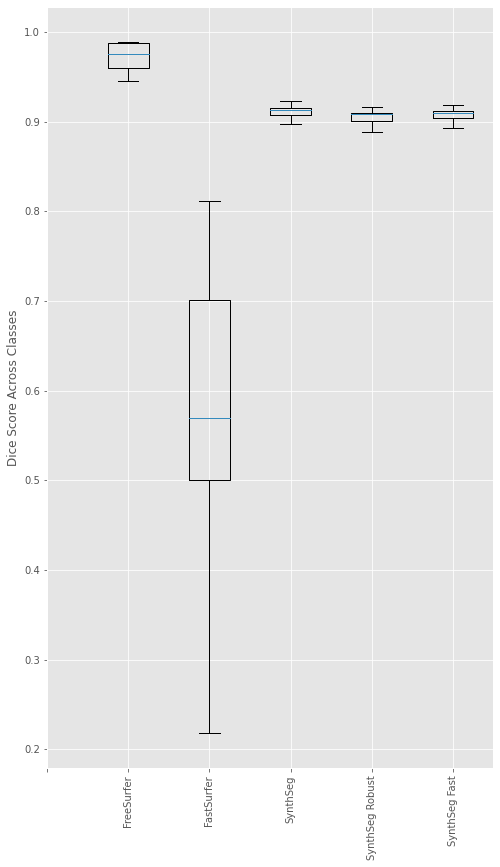

In [9]:
boxes = [freesurfer_df.Dice.values, fastsurfer_df.Dice.values, ss_df.Dice.values, rob_df.Dice.values, fast_df.Dice.values]
xs = list(range(6))
plt.style.use("ggplot")
plt.figure(figsize=(8,14))
plt.boxplot(boxes)
plt.xticks(ticks=xs, labels=["", "FreeSurfer", "FastSurfer", "SynthSeg", "SynthSeg Robust", "SynthSeg Fast"], rotation="vertical")
plt.ylabel("Dice Score Across Classes")
plt.savefig("./boxplot_dice.png")
plt.show()


In [10]:
freesurfer_df.Dice.values.mean()

0.9726590758612765

[0, 2, 3, 41, 42]

2:  Left White Matter

3:  Left Gray Matter

41: Right White Matter

42: Right Gray Matter



In [11]:
def create_df_with_all_values(df):
    names, dice, asd_lwm, asd_lgm, asd_rwm, asd_rgm, hd_lwm, hd_lgm, hd_rwm, hd_rgm = [], [], [], [], [], [], [], [], [], []
    for i, r in df.iterrows():
        names.append(r.Name)
        dice.append(r.Dice)
        asd_lwm.append(r.AverageSurfaceDistance[0][0])
        asd_lgm.append(r.AverageSurfaceDistance[1][0])
        asd_rwm.append(r.AverageSurfaceDistance[2][0])
        asd_rgm.append(r.AverageSurfaceDistance[3][0])
        hd_lwm.append(r.Hausdorff[0])
        hd_lgm.append(r.Hausdorff[1])
        hd_rwm.append(r.Hausdorff[2])
        hd_rgm.append(r.Hausdorff[3])
    res_dic = {"Name": names, "Dice": dice, "ASD_LWM": asd_lwm, "ASD_LGM": asd_lgm, "ASD_RWM": asd_rwm, "ASD_RGM": asd_rgm, "HD_LWM": hd_lwm, "HD_LGM": hd_lgm, "HD_RWM": hd_rwm, "HD_RGM": hd_rgm}
    return pd.DataFrame(res_dic)

In [12]:
freesurfer_df_all = create_df_with_all_values(freesurfer_df)
fastsurfer_df_all = create_df_with_all_values(fastsurfer_df)
ss_df_all = create_df_with_all_values(ss_df)
rob_df_all = create_df_with_all_values(rob_df)
fast_df_all = create_df_with_all_values(fast_df)

In [15]:
fastsurfer_df_all

,Name,Dice,ASD_LWM,ASD_LGM,ASD_RWM,ASD_RGM,HD_LWM,HD_LGM,HD_RWM,HD_RGM
0,210525,0.542417,5.081886,4.436687,6.770679,6.650874,17.029386,15.905974,21.354157,21.794495
1,l4879,0.486151,10.509875,10.364213,6.931411,6.440733,35.227830,36.249138,34.336569,33.241540
2,l7349,0.641175,5.024118,4.044887,3.290085,2.397451,16.093477,15.297059,16.124515,15.000000
3,fb9364,0.732807,1.097454,1.801784,1.084212,1.772655,8.124038,5.830952,7.681146,6.000000
4,fb9455,0.385547,6.629294,6.094617,9.684623,9.208625,32.939338,31.416556,41.484937,39.824616
5,jb1922,0.590882,5.857604,6.200189,6.513488,5.987549,25.317978,28.178006,26.832816,26.476405
6,me0801,0.811754,0.876865,1.028607,0.764269,0.920528,7.000000,3.605551,6.164414,3.000000
7,me1102,0.546861,15.502579,15.033993,13.497215,13.240853,54.671748,53.150729,50.655701,49.729267
8,vk1506,0.217555,27.578386,26.928230,31.150985,31.915685,77.000000,76.850504,84.557673,85.871998
9,vk3464,0.721403,5.542204,4.411830,4.306827,3.251610,16.340135,15.066519,15.362291,13.784049


In [19]:
asd_lwm_means = [freesurfer_df_all.ASD_LWM.values.mean(),
                 fastsurfer_df_all.ASD_LWM.values.mean(),
                 ss_df_all.ASD_LWM.values.mean(),
                 rob_df_all.ASD_LWM.values.mean(),
                 fast_df_all.ASD_LWM.values.mean()
                ]
asd_lgm_means = [freesurfer_df_all.ASD_LGM.values.mean(),
                 fastsurfer_df_all.ASD_LGM.values.mean(),
                 ss_df_all.ASD_LGM.values.mean(),
                 rob_df_all.ASD_LGM.values.mean(),
                 fast_df_all.ASD_LGM.values.mean()
                ]
asd_rwm_means = [freesurfer_df_all.ASD_RWM.values.mean(),
                 fastsurfer_df_all.ASD_RWM.values.mean(),
                 ss_df_all.ASD_RWM.values.mean(),
                 rob_df_all.ASD_RWM.values.mean(),
                 fast_df_all.ASD_RWM.values.mean()
                ]
asd_rgm_means = [freesurfer_df_all.ASD_RGM.values.mean(),
                 fastsurfer_df_all.ASD_RGM.values.mean(),
                 ss_df_all.ASD_RGM.values.mean(),
                 rob_df_all.ASD_RGM.values.mean(),
                 fast_df_all.ASD_RGM.values.mean()
                ]

In [20]:
hd_lwm_means = [freesurfer_df_all.HD_LWM.values.mean(),
                 fastsurfer_df_all.HD_LWM.values.mean(),
                 ss_df_all.HD_LWM.values.mean(),
                 rob_df_all.HD_LWM.values.mean(),
                 fast_df_all.HD_LWM.values.mean()
                ]
hd_lgm_means = [freesurfer_df_all.HD_LGM.values.mean(),
                 fastsurfer_df_all.HD_LGM.values.mean(),
                 ss_df_all.HD_LGM.values.mean(),
                 rob_df_all.HD_LGM.values.mean(),
                 fast_df_all.HD_LGM.values.mean()
                ]
hd_rwm_means = [freesurfer_df_all.HD_RWM.values.mean(),
                 fastsurfer_df_all.HD_RWM.values.mean(),
                 ss_df_all.HD_RWM.values.mean(),
                 rob_df_all.HD_RWM.values.mean(),
                 fast_df_all.HD_RWM.values.mean()
                ]
hd_rgm_means = [freesurfer_df_all.HD_RGM.values.mean(),
                 fastsurfer_df_all.HD_RGM.values.mean(),
                 ss_df_all.HD_RGM.values.mean(),
                 rob_df_all.HD_RGM.values.mean(),
                 fast_df_all.HD_RGM.values.mean()
                ]

In [61]:
labels = ["FreeSurfer", "FastSurfer", "SynthSeg", "SynthSeg Robust", "SynthSeg Fast"]
x = np.arange(len(labels))
width = 0.5

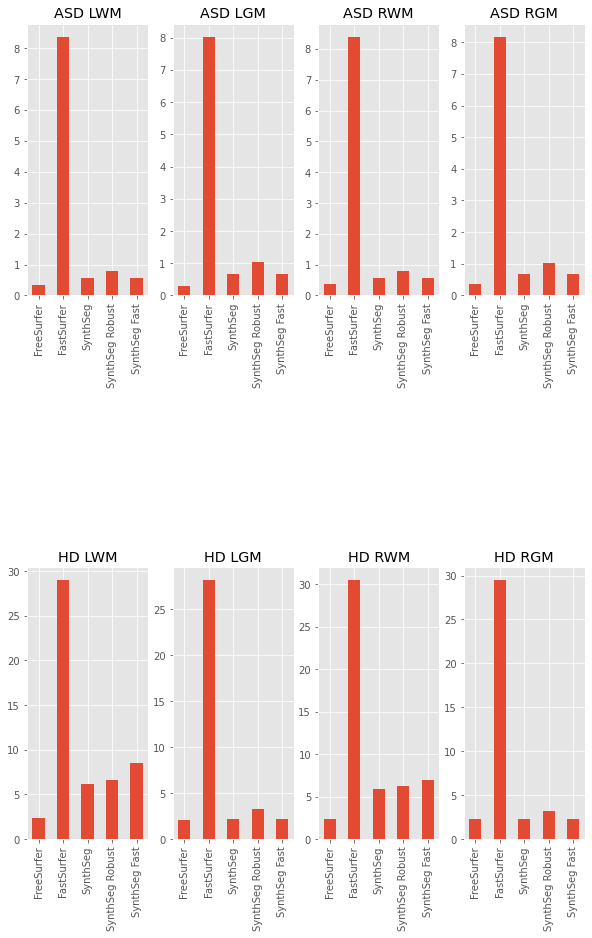

In [62]:

fig, axs = plt.subplots(2, 4, figsize=(10,15))
fig.subplots_adjust(hspace=1)

axs[0,0].bar(x=x, height=asd_lwm_means, width=width)
axs[0,0].set_xticks(ticks=x, labels=labels, rotation="vertical")
axs[0,0].set_title("ASD LWM")

axs[0,1].bar(x=x, height=asd_lgm_means, width=width)
axs[0,1].set_xticks(ticks=x, labels=labels, rotation="vertical")
axs[0,1].set_title("ASD LGM")

axs[0,2].bar(x=x, height=asd_rwm_means, width=width)
axs[0,2].set_xticks(ticks=x, labels=labels, rotation="vertical")
axs[0,2].set_title("ASD RWM")

axs[0,3].bar(x=x, height=asd_rgm_means, width=width)
axs[0,3].set_xticks(ticks=x, labels=labels, rotation="vertical")
axs[0,3].set_title("ASD RGM")


axs[1,0].bar(x=x, height=hd_lwm_means, width=width)
axs[1,0].set_xticks(ticks=x, labels=labels, rotation="vertical")
axs[1,0].set_title("HD LWM")

axs[1,1].bar(x=x, height=hd_lgm_means, width=width)
axs[1,1].set_xticks(ticks=x, labels=labels, rotation="vertical")
axs[1,1].set_title("HD LGM")

axs[1,2].bar(x=x, height=hd_rwm_means, width=width)
axs[1,2].set_xticks(ticks=x, labels=labels, rotation="vertical")
axs[1,2].set_title("HD RWM")

axs[1,3].bar(x=x, height=hd_rgm_means, width=width)
axs[1,3].set_xticks(ticks=x, labels=labels, rotation="vertical")
axs[1,3].set_title("HD RGM")

plt.savefig("./asd_hd_bars.png")
plt.show()

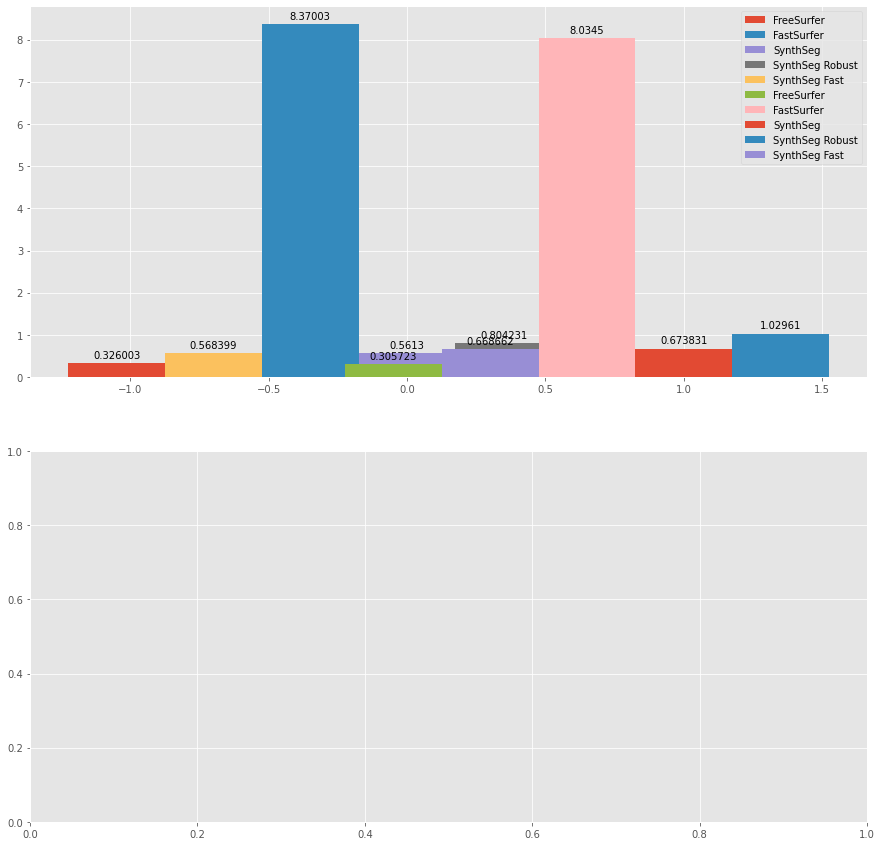

In [75]:
tissues = ["Left White Matter", "Left Gray Matter", "Right White Matter", "Right Gray Matter"]
x = np.arange(len(tissues))
width = 0.35

fig, axs = plt.subplots(2, 1, figsize=(15,15))

asd1 = axs[0].bar(x[0] - 3*width, asd_lwm_means[0], width, label=labels[0])
asd2 = axs[0].bar(x[0] - width, asd_lwm_means[1], width, label=labels[1])
asd3 = axs[0].bar(x[0] , asd_lwm_means[2], width, label=labels[2])
asd4 = axs[0].bar(x[0] +  width, asd_lwm_means[3], width, label=labels[3])
asd5 = axs[0].bar(x[0] - 2*width, asd_lwm_means[4], width, label=labels[4])

axs[0].bar_label(asd1, padding=3)
axs[0].bar_label(asd2, padding=3)
axs[0].bar_label(asd3, padding=3)
axs[0].bar_label(asd4, padding=3)
axs[0].bar_label(asd5, padding=3)

asd11 = axs[0].bar(x[1] - 3*width, asd_lgm_means[0], width, label=labels[0])
asd21 = axs[0].bar(x[1] - width, asd_lgm_means[1], width, label=labels[1])
asd31 = axs[0].bar(x[1] , asd_lgm_means[2], width, label=labels[2])
asd41 = axs[0].bar(x[1] +  width, asd_lgm_means[3], width, label=labels[3])
asd51 = axs[0].bar(x[1] - 2*width, asd_lgm_means[4], width, label=labels[4])

axs[0].bar_label(asd11, padding=3)
axs[0].bar_label(asd21, padding=3)
axs[0].bar_label(asd31, padding=3)
axs[0].bar_label(asd41, padding=3)
axs[0].bar_label(asd51, padding=3)






axs[0].legend()

plt.show()

In [76]:
ay = pd.concat([freesurfer_df_all, fastsurfer_df_all, ss_df_all, rob_df_all, fast_df_all])

In [79]:
freesurfer_df_all.index.names

FrozenList([None])

In [80]:
haha = freesurfer_df_all.copy()

In [81]:
haha

,Name,Dice,ASD_LWM,ASD_LGM,ASD_RWM,ASD_RGM,HD_LWM,HD_LGM,HD_RWM,HD_RGM
0,210525,0.957753,0.197282,0.227284,1.112110,1.008264,1.000000,1.000000,6.324555,4.582576
1,l4879,0.955927,1.095963,0.914783,0.728318,0.667500,8.366600,5.916080,5.385165,4.123106
2,l7349,0.944790,1.474767,1.231690,1.073069,1.037105,12.369317,9.486833,9.643651,8.124038
3,fb9364,0.989191,0.018498,0.060055,0.004498,0.059517,0.000000,0.000000,0.000000,0.000000
4,fb9455,0.972105,0.163121,0.137051,0.189954,0.161783,1.000000,1.414214,1.000000,1.414214
5,jb1922,0.989259,0.073330,0.054504,0.067363,0.056242,0.000000,0.000000,0.000000,0.000000
6,me0801,0.982316,0.056065,0.084403,0.042675,0.088832,0.000000,1.000000,0.000000,1.000000
7,me1102,0.989116,0.021255,0.084385,0.026263,0.117640,0.000000,0.000000,0.000000,1.000000
8,vk1506,0.967139,0.124746,0.174416,0.327052,0.297306,1.000000,1.414214,1.732051,1.414214
9,vk3464,0.978995,0.035000,0.088661,0.075750,0.146662,0.000000,1.000000,0.000000,1.000000


In [84]:
haha = haha.set_index("Name")

In [86]:
haha.Dice

Name
210525    0.957753
l4879     0.955927
l7349     0.944790
fb9364    0.989191
fb9455    0.972105
jb1922    0.989259
me0801    0.982316
me1102    0.989116
vk1506    0.967139
vk3464    0.978995
Name: Dice, dtype: float64

In [88]:
gege = fastsurfer_df_all.set_index("Name")
gege

,Dice,ASD_LWM,ASD_LGM,ASD_RWM,ASD_RGM,HD_LWM,HD_LGM,HD_RWM,HD_RGM
Name,,,,,,,,,
210525,0.542417,5.081886,4.436687,6.770679,6.650874,17.029386,15.905974,21.354157,21.794495
l4879,0.486151,10.509875,10.364213,6.931411,6.440733,35.227830,36.249138,34.336569,33.241540
l7349,0.641175,5.024118,4.044887,3.290085,2.397451,16.093477,15.297059,16.124515,15.000000
fb9364,0.732807,1.097454,1.801784,1.084212,1.772655,8.124038,5.830952,7.681146,6.000000
fb9455,0.385547,6.629294,6.094617,9.684623,9.208625,32.939338,31.416556,41.484937,39.824616
jb1922,0.590882,5.857604,6.200189,6.513488,5.987549,25.317978,28.178006,26.832816,26.476405
me0801,0.811754,0.876865,1.028607,0.764269,0.920528,7.000000,3.605551,6.164414,3.000000
me1102,0.546861,15.502579,15.033993,13.497215,13.240853,54.671748,53.150729,50.655701,49.729267
vk1506,0.217555,27.578386,26.928230,31.150985,31.915685,77.000000,76.850504,84.557673,85.871998


In [89]:
pd.concat([haha, gege])

,Dice,ASD_LWM,ASD_LGM,ASD_RWM,ASD_RGM,HD_LWM,HD_LGM,HD_RWM,HD_RGM
Name,,,,,,,,,
210525,0.957753,0.197282,0.227284,1.112110,1.008264,1.000000,1.000000,6.324555,4.582576
l4879,0.955927,1.095963,0.914783,0.728318,0.667500,8.366600,5.916080,5.385165,4.123106
l7349,0.944790,1.474767,1.231690,1.073069,1.037105,12.369317,9.486833,9.643651,8.124038
fb9364,0.989191,0.018498,0.060055,0.004498,0.059517,0.000000,0.000000,0.000000,0.000000
fb9455,0.972105,0.163121,0.137051,0.189954,0.161783,1.000000,1.414214,1.000000,1.414214
jb1922,0.989259,0.073330,0.054504,0.067363,0.056242,0.000000,0.000000,0.000000,0.000000
me0801,0.982316,0.056065,0.084403,0.042675,0.088832,0.000000,1.000000,0.000000,1.000000
me1102,0.989116,0.021255,0.084385,0.026263,0.117640,0.000000,0.000000,0.000000,1.000000
vk1506,0.967139,0.124746,0.174416,0.327052,0.297306,1.000000,1.414214,1.732051,1.414214


In [91]:
freesurfer_df_all.to_excel("./freesurfer_eval.xlsx")
fastsurfer_df_all.to_excel("./fastsurfer_eval.xlsx")
ss_df_all.to_excel("./synthseg_normal_eval.xlsx")
rob_df_all.to_excel("./synthseg_robust_eval.xlsx")
fast_df_all.to_excel("./synthseg_fast_eval.xlsx")